In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [18]:
x = np.array([1,2,2,3,4,4,5,6])
y = np.array([2,3,4,4,4,6,5,7])
df = pd.DataFrame({'x':x,'y':y})
df

,x,y
0,1,2
1,2,3
2,2,4
3,3,4
4,4,4
5,4,6
6,5,5
7,6,7


In [19]:
df["xy"]= df["x"]*df["y"]
df["x_square"]= df["x"]*df["x"]
df

,x,y,xy,x_square
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36


In [20]:
df.loc['Total'] = df.sum()
df

,x,y,xy,x_square
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36
Total,27,35,135,111


In [21]:
# n: is the number of elements
# m: is the slope
n = df.shape[0]-1
m = (n*df.iloc[-1,2] - df.iloc[-1,0]*df.iloc[-1,1]) / (n*df.iloc[-1,3] - (df.iloc[-1,0]**2))
m

0.8490566037735849

In [22]:
# b: is the intercept
b = y.mean() - m*x.mean()
b

1.5094339622641506

In [23]:
df["y_pred"] = m*df["x"] + b
df

,x,y,xy,x_square,y_pred
0,1,2,2,1,2.358491
1,2,3,6,4,3.207547
2,2,4,8,4,3.207547
3,3,4,12,9,4.056604
4,4,4,16,16,4.905660
5,4,6,24,16,4.905660
6,5,5,25,25,5.754717
7,6,7,42,36,6.603774
Total,27,35,135,111,24.433962


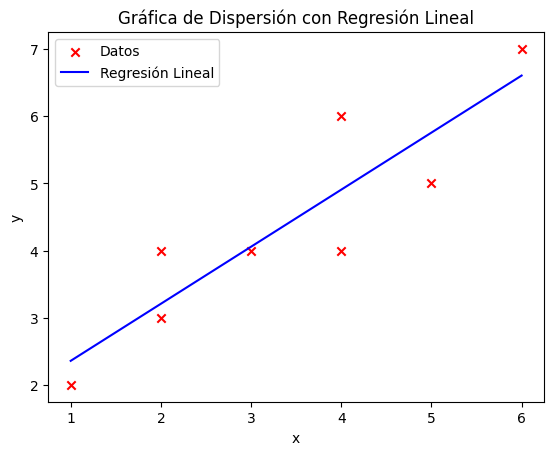

In [24]:
plt.scatter(df['x'][:-1], df['y'][:-1], marker= 'x', color='red', label='Datos')
plt.plot(df['x'][:-1], df['y_pred'][:-1], color='blue', label='Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de Dispersión con Regresión Lineal')
plt.legend()
plt.show()


In [25]:
df["(y-y_pred)"] = df["y"]-df["y_pred"]
df

,x,y,xy,x_square,y_pred,(y-y_pred)
0,1,2,2,1,2.358491,-0.358491
1,2,3,6,4,3.207547,-0.207547
2,2,4,8,4,3.207547,0.792453
3,3,4,12,9,4.056604,-0.056604
4,4,4,16,16,4.905660,-0.905660
5,4,6,24,16,4.905660,1.094340
6,5,5,25,25,5.754717,-0.754717
7,6,7,42,36,6.603774,0.396226
Total,27,35,135,111,24.433962,10.566038


In [27]:
df["(y-y_pred_square)"] = df["(y-y_pred)"]**2
df

,x,y,xy,x_square,y_pred,(y-y_pred),(y-y_pred_square)
0,1,2,2,1,2.358491,-0.358491,0.128515
1,2,3,6,4,3.207547,-0.207547,0.043076
2,2,4,8,4,3.207547,0.792453,0.627981
3,3,4,12,9,4.056604,-0.056604,0.003204
4,4,4,16,16,4.905660,-0.905660,0.820221
5,4,6,24,16,4.905660,1.094340,1.197579
6,5,5,25,25,5.754717,-0.754717,0.569598
7,6,7,42,36,6.603774,0.396226,0.156995
Total,27,35,135,111,24.433962,10.566038,111.641153


In [28]:
sr = sum(df["(y-y_pred_square)"][:-1])
sr

3.547169811320755

In [29]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)
print(p)
print(std_err)

0.8952971203083395
0.002648943845347856
0.1724692981232967
